In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('C:/data/Position_Salaries.csv').values
dataset

array([['Business Analyst', 1, 45000],
       ['Junior Consultant', 2, 50000],
       ['Senior Consultant', 3, 60000],
       ['Manager', 4, 80000],
       ['Country Manager', 5, 110000],
       ['Region Manager', 6, 150000],
       ['Partner', 7, 200000],
       ['Senior Partner', 8, 300000],
       ['C-level', 9, 500000],
       ['CEO', 10, 1000000]], dtype=object)

In [12]:
X = dataset[:,1:2]
y = dataset[:,-1]
# Label column만 사용( column을 index 1로만 지정할 경우, 1D가 되므로 범위로 지정)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(7, 1) (3, 1) (7,) (3,)


In [14]:
from sklearn.preprocessing import PolynomialFeatures # X를 확장하는 과정
poly = PolynomialFeatures(degree = 3) 
poly.fit(X_train)
X_trainPoly = poly.transform(X_train)
# 값이 하나였지만 2개의 값이 더 생김

In [15]:
from sklearn.linear_model import LinearRegression
polyLR = LinearRegression()
polyLR.fit(X_trainPoly,y_train)

LinearRegression()

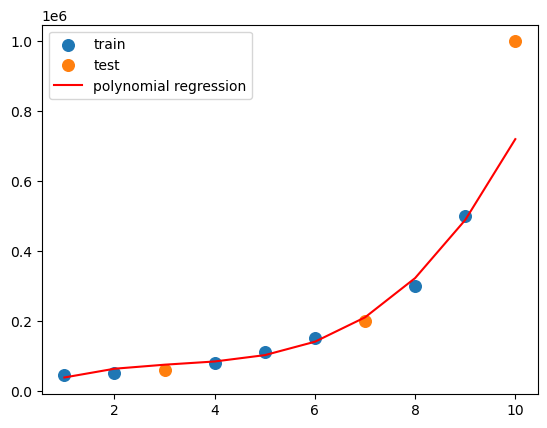

In [16]:
plt.scatter(X_train,y_train,label = 'train',s = 70)
plt.scatter(X_test,y_test, label = 'test', s = 70)
X_Poly = poly.transform(X)
y_pred_Poly = polyLR.predict(X_Poly)
plt.plot(X,y_pred_Poly,color = 'red',label = 'polynomial regression')
plt.legend()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

yp_train = polyLR.predict(X_trainPoly)
X_testPoly = poly.transform(X_test)
y_pred = polyLR.predict(X_testPoly)

print('[Training]')
print('mse: ',mean_squared_error(y_train,yp_train))
print('mae: ',mean_absolute_error(y_train,yp_train))
print('r2: ',r2_score(y_train,yp_train))
      
print('[Test]')
print('mse: ',mean_squared_error(y_test,y_pred))
print('mae: ',mean_absolute_error(y_test,y_pred))
print('r2: ',r2_score(y_test,y_pred))
# degree 11일 때, training data에 대한 r2는 1.0이지만
# test data에 대한 r2는 0.76으로 degree 5인 경우보다
# 더 좋지 않은 결과를 보인다 -> Overfitting

[Training]
mse:  145967173.85178977
mae:  10810.087348548712
r2:  0.9939048178288485
[Test]
mse:  26188091387.73021
mae:  101129.19132149639
r2:  0.8472700735552282


In [18]:
X_test.shape

(3, 1)